In [65]:
import seaborn as sns
diamonds=sns.load_dataset("diamonds")

In [66]:
df=diamonds.copy()

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


**DİAMONDS VERİ SETİ**

✅carat:elmasın ağırlığı

✅cut:elmasın kesim gücü(fair, good, very good, premium, ideal).Bu sütun object
 türünde fakat ordinal değerler aldığı için benim bu sütunu category veri
 tipine dönüştürmem lazım

✅color:elmasın rengini gösteriyor.(D en iyi J en kötü)bu sütun da ordianl veriler içerdiği için category veri tipine çevirmem lazım

✅clarity:elmasın berrraklığı.Veri setini incelediğimizde  bu sütunun da ordinal verileri içerdiğini anlıyoruz.Bu yüzden category veri tipine çevirmemiz lazım

✅depth:derinlik yüzdesi

✅table:elmasın üst yüzeyinin genişliği

✅price:elmasın fiyatı

✅x,y,z:elmasın boyutları


In [68]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [70]:
#ordinal tanımlama
from pandas.api.types import CategoricalDtype
df.cut=df.cut.astype(CategoricalDtype(ordered=True))#ordinal bir kategorik değilken olması için

In [71]:
df.cut.head(1)

,cut
0,Ideal


In [72]:
cut_kategoriler=["Fair","Good","Very Good","Premium","Ideal"]
df.cut=df.cut.astype(CategoricalDtype(categories=cut_kategoriler,ordered=True))#sırasına uygun olsun .

In [73]:
df.cut.value_counts()

,count
cut,
Ideal,21551
Premium,13791
Very Good,12082
Good,4906
Fair,1610


In [74]:
df["color"].value_counts()

,count
color,
G,11292
E,9797
F,9542
H,8304
D,6775
I,5422
J,2808


In [75]:
df.color=df.color.astype(CategoricalDtype(ordered=True))

In [76]:
color_kategoriler=["D","E","F","G","H","I","J"]
df.color=df.color.astype(CategoricalDtype(categories=color_kategoriler,ordered=True))

In [77]:
df.color.head()

,color
0,E
1,E
2,E
3,I
4,J


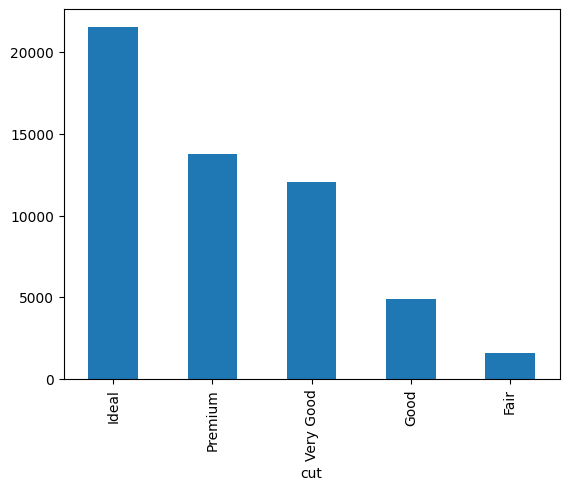

In [78]:
#barplot
df["cut"].value_counts().plot.bar();

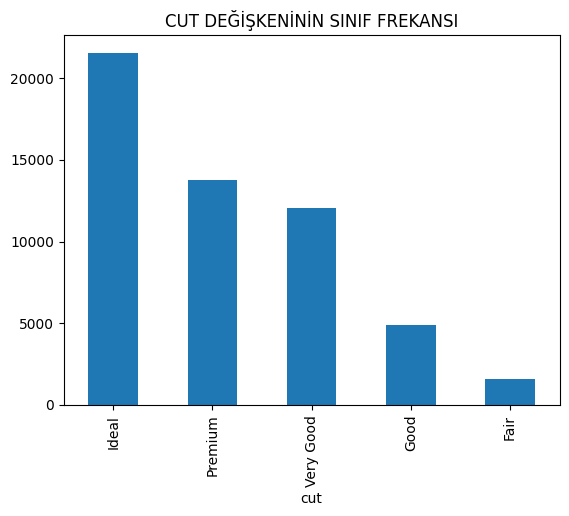

In [79]:
df["cut"].value_counts().plot.bar().set_title("CUT DEĞİŞKENİNİN SINIF FREKANSI");

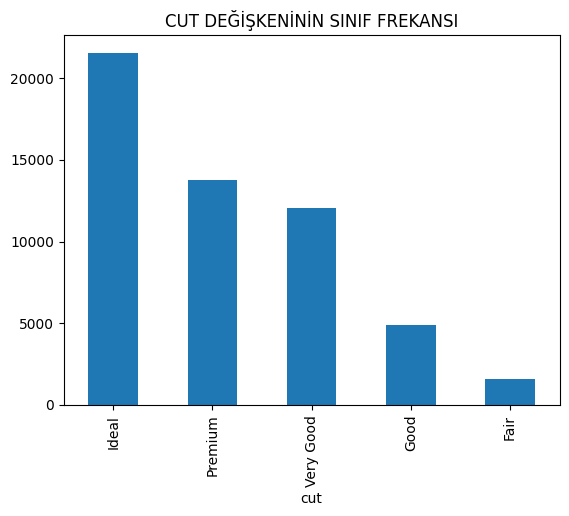

In [80]:
(df["cut"]
 .value_counts().plot.bar()
 .set_title("CUT DEĞİŞKENİNİN SINIF FREKANSI"));

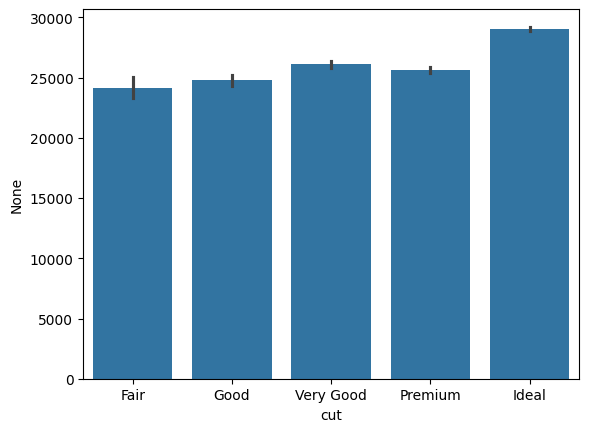

In [81]:
sns.barplot(x="cut",y=df.cut.index,data=df);

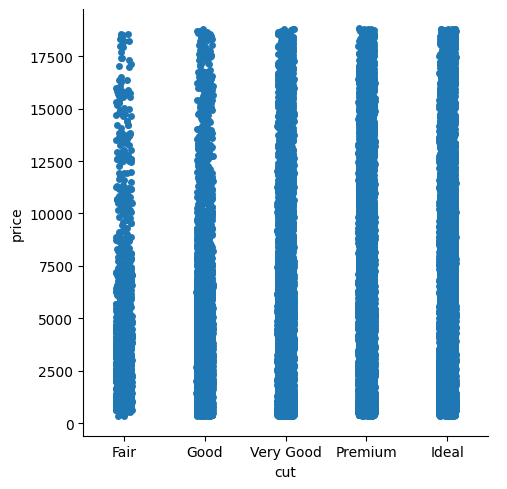

In [82]:
#catplo7=barplot kategorik değişkenlerin görselleştirmek için kullanılan bir fonksiyon
sns.catplot(x="cut",y="price",data=df);

In [83]:
df.groupby("cut")["price"].count()

/tmp/ipython-input-2769395694.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("cut")["price"].count()


,price
cut,
Fair,1610
Good,4906
Very Good,12082
Premium,13791
Ideal,21551


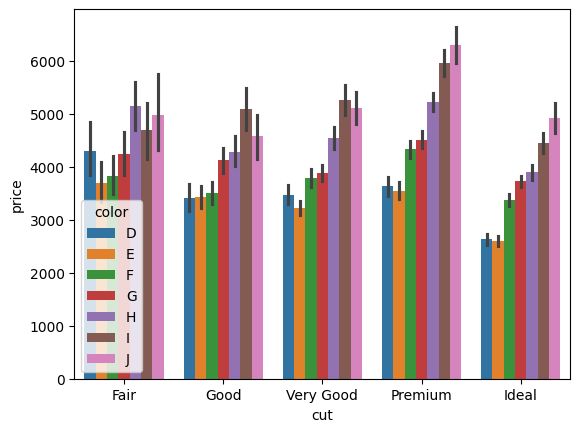

In [84]:
sns.barplot(x="cut",y="price",hue="color",data=df);

In [85]:
df.groupby(["cut","color"])["price"].mean()

/tmp/ipython-input-1250844969.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["cut","color"])["price"].mean()


cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        3374.939362
           G        3720.706388
           H        3889.334831
           I        4451.970377
           J        4918.186384
Name: price, dtype: float64

/tmp/ipython-input-812832177.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price,kde=False);#distplot-->belirlenen aralıktaki değerlerden kaç tane olduğunu hesapalr


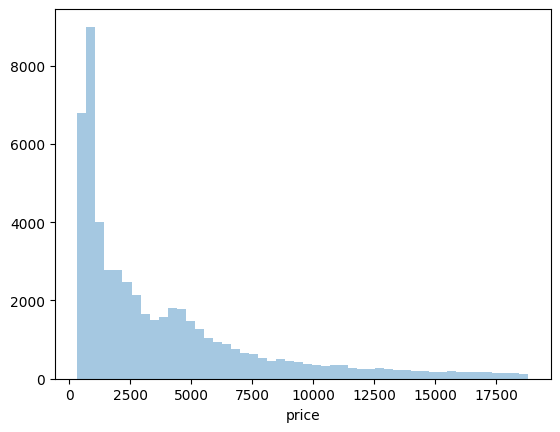

In [86]:
#Histogram grafiğini oluşturmak için kullanılır.-->Distplot
sns.distplot(df.price,kde=False);#distplot-->belirlenen aralıktaki değerlerden kaç tane olduğunu hesapalr

In [87]:
df['price'][(df["price"] > 0) & (df["price"] < 2500)].count()


np.int64(27540)

/tmp/ipython-input-2532232288.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price,bins=10,kde=False);#bins 10 tane kutucuk oluşturur,Genişlikler artar


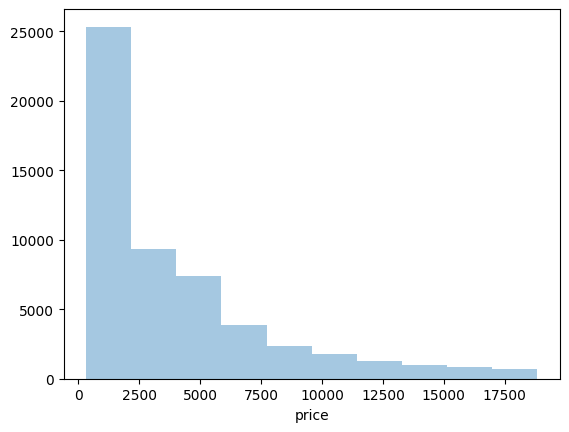

In [88]:
sns.distplot(df.price,bins=10,kde=False);#bins 10 tane kutucuk oluşturur,Genişlikler artar
#kutuların barındırdıkları değerler artar

/tmp/ipython-input-689887770.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price);


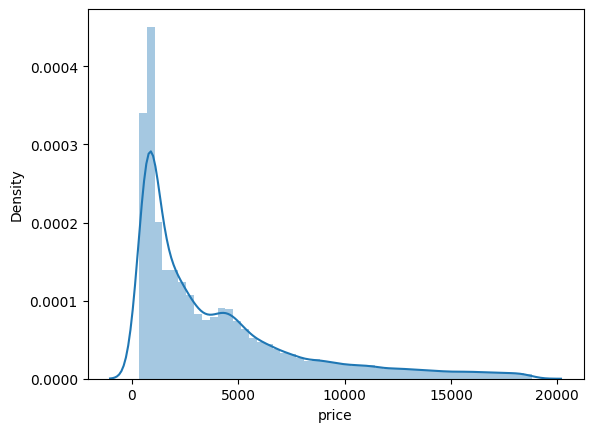

In [89]:
sns.distplot(df.price);

/tmp/ipython-input-1859046445.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price,hist=False);


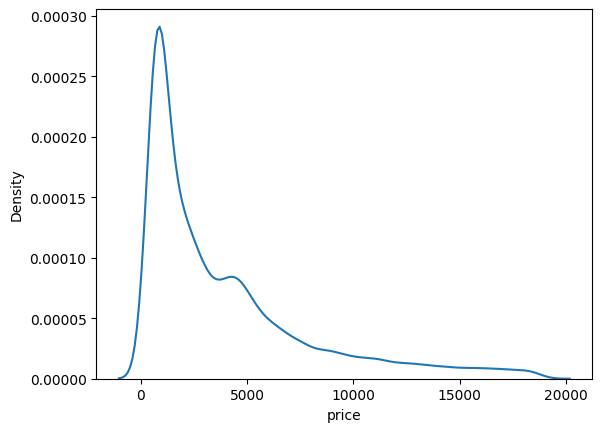

In [90]:
sns.distplot(df.price,hist=False);

/tmp/ipython-input-998896402.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.price,shade=True);#yoğunluk grafiğinin altını doldurmak için kullanılır -->kdeplot


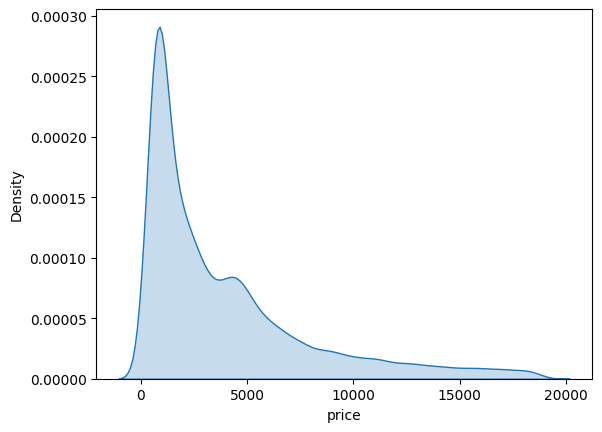

In [91]:
sns.kdeplot(df.price,shade=True);#yoğunluk grafiğinin altını doldurmak için kullanılır -->kdeplot

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_a

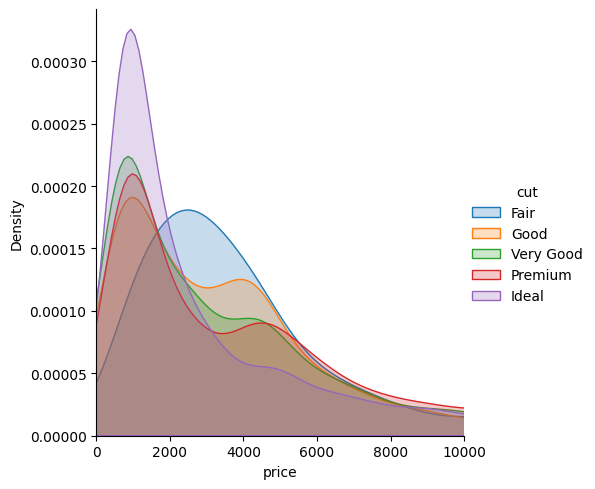

In [92]:
#Bağımlı değişken-->Hedeflediğimiz ana değişkendir.
#FacetGride çoklu grafikler oluşturmak için kullanılır
#Shade renklendirmek amaçlı kullanılır
#add_legend  grafikte açıklama yapmak için kullanılır
#xlim x ekseninde hangi aralıklar üzerinde çalışacağımı belirlemek için kullanılır
#map x değişkeninin her bir alt kümesine kdeplot grafiğini uygular
(sns
 .FacetGrid(df,
               hue="cut",
               height=5,
               xlim=(0,10000))
 .map(sns.kdeplot,"price",shade=True)
 .add_legend()
 );

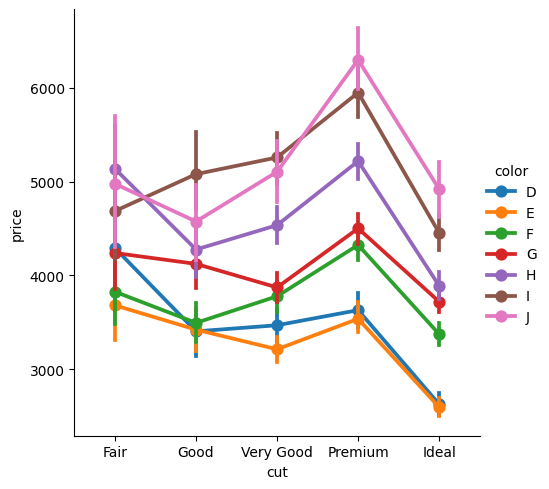

In [93]:
sns.catplot(x="cut",y="price",hue="color",kind="point",data=df);

In [94]:
df.groupby(["cut","color"])["price"].mean()

/tmp/ipython-input-1250844969.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["cut","color"])["price"].mean()


cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        3374.939362
           G        3720.706388
           H        3889.334831
           I        4451.970377
           J        4918.186384
Name: price, dtype: float64